In [3]:
import os
from PIL import Image
import matplotlib.pyplot as plt

In [5]:
images_folder = '/Users/steffidorothy/Downloads/archive (2)/train_zip/train'

In [11]:
image_files = [f for f in os.listdir(images_folder) if f.endswith('.jpg')]
print(image_files[:5])

['apple_75.jpg', 'apple_61.jpg', 'apple_49.jpg', 'orange_3.jpg', 'orange_28.jpg']


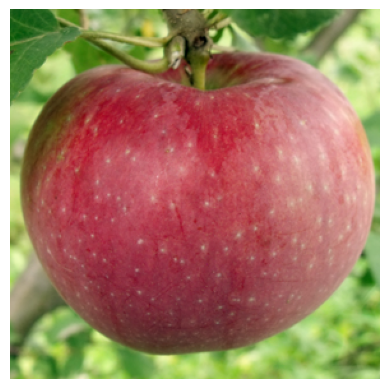

In [13]:
image_path = os.path.join(images_folder, image_files[0])
image = Image.open(image_path)
plt.imshow(image)
plt.axis('off')
plt.show()

In [43]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Path to the images folder on your Mac
images_folder = '/Users/steffidorothy/Downloads/archive (2)/train_zip/train'

# List all .jpg files in the images folder (ignore .xml files)
image_files = [f for f in os.listdir(images_folder) if f.endswith('.jpg')]

# Print the first few .jpg image file names to verify
print(image_files[:5])

# Function to get image size
def get_image_size(image_path):
    with Image.open(image_path) as img:
        return img.size

# Function to resize image
def resize_image(image_path, target_size):
    with Image.open(image_path) as img:
        resized_image = img.resize(target_size)
        return resized_image
target_size = (256, 256)
for image_file in image_files:
    image_path = os.path.join(images_folder, image_file)
    original_size = get_image_size(image_path)
    print(f"Original size of {image_file}: {original_size}")
    resized_image = resize_image(image_path, target_size)
    print(f"Resized size of {image_file}: {resized_image.size}")
    assert resized_image.size == target_size, f"Size mismatch for {image_path}. Got {resized_image.size}, expected {target_size}"
    print(f"Processed {image_file}")

print("All .jpg images have been resized and verified.")

['apple_75.jpg', 'apple_61.jpg', 'apple_49.jpg', 'orange_3.jpg', 'orange_28.jpg']
Original size of apple_75.jpg: (290, 290)
Resized size of apple_75.jpg: (256, 256)
Processed apple_75.jpg
Original size of apple_61.jpg: (500, 500)
Resized size of apple_61.jpg: (256, 256)
Processed apple_61.jpg
Original size of apple_49.jpg: (271, 300)
Resized size of apple_49.jpg: (256, 256)
Processed apple_49.jpg
Original size of orange_3.jpg: (250, 250)
Resized size of orange_3.jpg: (256, 256)
Processed orange_3.jpg
Original size of orange_28.jpg: (320, 320)
Resized size of orange_28.jpg: (256, 256)
Processed orange_28.jpg
Original size of banana_50.jpg: (620, 413)
Resized size of banana_50.jpg: (256, 256)
Processed banana_50.jpg
Original size of orange_14.jpg: (300, 293)
Resized size of orange_14.jpg: (256, 256)
Processed orange_14.jpg
Original size of banana_44.jpg: (680, 450)
Resized size of banana_44.jpg: (256, 256)
Processed banana_44.jpg
Original size of banana_45.jpg: (724, 780)
Resized size of

In [77]:
from datasets import load_dataset

ds = load_dataset("DiegoP-S/DatasetSynthesis")

Found cached dataset parquet (/Users/steffidorothy/.cache/huggingface/datasets/DiegoP-S___parquet/DiegoP-S--DatasetSynthesis-ed84e2483f1cce6e/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)


  0%|          | 0/1 [00:00<?, ?it/s]

In [79]:
print(ds)

DatasetDict({
    train: Dataset({
        features: ['file_name', 'group', 'image'],
        num_rows: 2483
    })
})


In [87]:
from PIL import Image
from io import BytesIO
def get_image_from_bytes(image_bytes):
    try:
        if image_bytes == b'null':  # Check for 'null' entries
            print("Skipping invalid image (null data).")
            return None
        with Image.open(BytesIO(image_bytes)) as img:
            return img.size
    except Exception as e:
        print(f"Error processing image: {e}")
        return None
train_data = ds['train']
valid_image_sizes = []
for record in train_data:
    image_bytes = record['image']
    image_size = get_image_from_bytes(image_bytes)
    if image_size:
        valid_image_sizes.append(image_size)
print(f"Valid image sizes: {valid_image_sizes[:5]}")

Skipping invalid image (null data).
Valid image sizes: [(512, 512), (512, 512), (512, 512), (512, 512), (512, 512)]


In [89]:
null_count = sum(1 for record in train_data if record['image'] == b'null')
print(f"Number of invalid (null) images: {null_count}")

Number of invalid (null) images: 1


In [177]:
def resize_image(image_bytes, target_size):
    try:
        if image_bytes == b'null':  # Check for 'null' entries
            print("Skipping invalid image (null data).")
            return None
        with Image.open(BytesIO(image_bytes)) as img:
            resized_img = img.resize(target_size)
            return resized_img
    except Exception as e:
        print(f"Error resizing image: {e}")
        return None
target_size = (256, 256)
resized_images = []
for record in train_data:
    image_bytes = record['image']
    resized_image = resize_image(image_bytes, target_size)
    if resized_image:
        resized_images.append(resized_image)
        print(f"Resized image size: {resized_image.size}")
# Optionally, save resized images or further process them
print(f"Resized {len(resized_images)} images.")

Skipping invalid image (null data).
Resized image size: (256, 256)
Resized image size: (256, 256)
Resized image size: (256, 256)
Resized image size: (256, 256)
Resized image size: (256, 256)
Resized image size: (256, 256)
Resized image size: (256, 256)
Resized image size: (256, 256)
Resized image size: (256, 256)
Resized image size: (256, 256)
Resized image size: (256, 256)
Resized image size: (256, 256)
Resized image size: (256, 256)
Resized image size: (256, 256)
Resized image size: (256, 256)
Resized image size: (256, 256)
Resized image size: (256, 256)
Resized image size: (256, 256)
Resized image size: (256, 256)
Resized image size: (256, 256)
Resized image size: (256, 256)
Resized image size: (256, 256)
Resized image size: (256, 256)
Resized image size: (256, 256)
Resized image size: (256, 256)
Resized image size: (256, 256)
Resized image size: (256, 256)
Resized image size: (256, 256)
Resized image size: (256, 256)
Resized image size: (256, 256)
Resized image size: (256, 256)
Res

In [113]:
import xml.etree.ElementTree as ET
xml_files = [f for f in os.listdir(images_folder) if f.endswith('.xml')]
class_labels = set()
def extract_class_label(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    # Assuming the class name is stored in <name> tag under <object>
    for obj in root.findall('object'):
        class_name = obj.find('name').text
        class_labels.add(class_name)

# Iterate over all XML files and extract class labels
for xml_file in xml_files:
    xml_path = os.path.join(images_folder, xml_file)
    extract_class_label(xml_path)

# Print all unique class labels
print(f"Unique class labels: {class_labels}")

Unique class labels: {'orange', 'apple', 'banana'}
